<a href="https://colab.research.google.com/github/ronnieogwang/Deep_learning_for_CV/blob/master/code/chapter_20/pretrained_resnet_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#resnet

In [0]:
import tensorflow as tf
from tensorflow import keras 

In [0]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout, add, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical,plot_model
from matplotlib import pyplot

In [4]:
#load dataset
(X_train, y_train),(X_test,(y_test)) = cifar10.load_data()
#summarize data
print("train X= %s and y=%s" % (X_train.shape, y_train.shape))
print("test X= %s and y=%s" % (X_test.shape, y_test.shape))


train X= (50000, 32, 32, 3) and y=(50000, 1)
test X= (10000, 32, 32, 3) and y=(10000, 1)


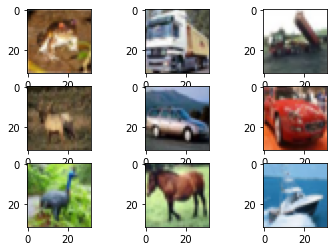

In [5]:
#plot images
for i in range(9):
  pyplot.subplot(331+i)
  pyplot.imshow(X_train[i])
pyplot.show()


In [0]:
#preprocess images
#Normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255.0
X_test = X_test/255.0

#categorical data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [7]:
y_train.shape

(50000, 10)

In [0]:
#define model
#load model without classifier layers
model = ResNet50(include_top=False, input_shape =(32,32,3))
#add classifier layers
flat1= Flatten()(model.output)
dense1 = Dense(1024, activation= 'relu', kernel_initializer='he_uniform')(flat1)
dense2 = Dense(10, activation='softmax')(dense1)
model = Model(inputs = model.inputs, outputs=dense2)
opt = SGD(lr=0.01, momentum = 0.9)
model.compile(optimizer = opt, loss= 'categorical_crossentropy', metrics = ['accuracy'])





In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

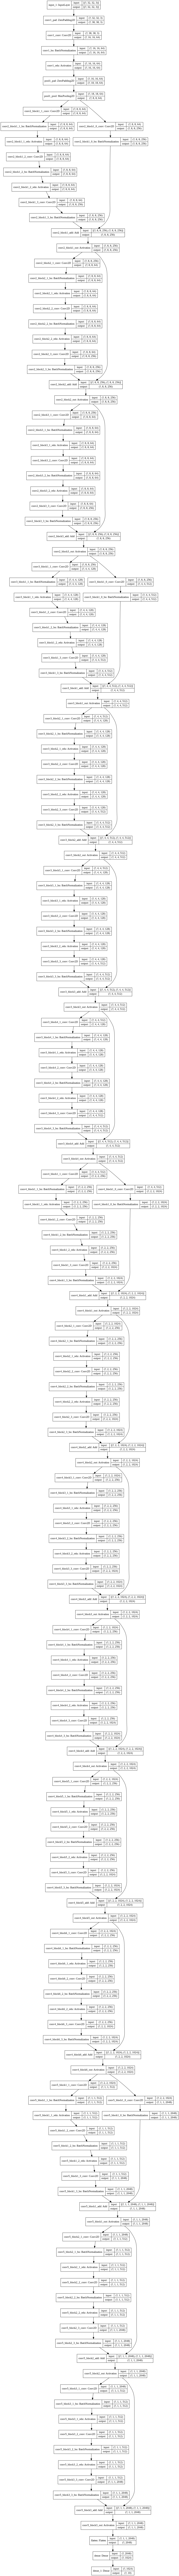

In [10]:
plot_model(model, show_shapes=True)

In [11]:
datagen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1, horizontal_flip=True, rotation_range=25)

iterator = datagen.flow(X_train, y_train, batch_size=64)

steps = int(X_train.shape[0] / 64)

history = model.fit_generator(iterator, steps_per_epoch = steps, epochs =20,validation_data = (X_test, y_test), verbose= 1 )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
781/781 [==============================] - 40s 51ms/step - loss: 1.7174 - accuracy: 0.3917 - val_loss: 3.2070 - val_accuracy: 0.2189
Epoch 2/20
781/781 [==============================] - 39s 50ms/step - loss: 1.2822 - accuracy: 0.5453 - val_loss: 1.4305 - val_accuracy: 0.5266
Epoch 3/20
781/781 [==============================] - 39s 50ms/step - loss: 1.0839 - accuracy: 0.6200 - val_loss: 1.0349 - val_accuracy: 0.6582
Epoch 4/20
781/781 [==============================] - 39s 50ms/step - loss: 0.9720 - accuracy: 0.6655 - val_loss: 0.9914 - val_accuracy: 0.6618
Epoch 5/20
781/781 [==============================] - 39s 50ms/step - loss: 0.8943 - accuracy: 0.6927 - val_loss: 0.8894 - val_accuracy: 0.7005
Epoch 6/20
781/781 [==============================] - 39s 50ms/step - loss: 0.8363 - accuracy: 0.7115 - val_loss: 1.5466 - val_accuracy: 0.5708
Epoch 7/20
781/781 [==============================] - 39s 50

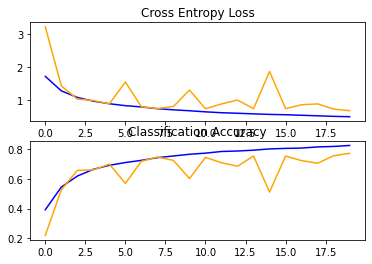

In [12]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

In [0]:
_,acc = model.evaluate(X_test,y_test, verbose = 0)

In [14]:
print('accuracy is: %.3f'%(acc*100.0))

accuracy is: 77.400
